#### Importing Standard Libraries

In [219]:
import numpy as np
import matplotlib.pyplot as pt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D, proj3d
import numdifftools as nd

#### Defining Standard Gradient Descent Function

In [220]:
def Gradient_Descent(f, x,Gradient, alpha, steps=50):
    count = 0
    tolerance = 1e-8 * np.ones(x.shape)
    x_k = np.array([x])  # Initialize with x as the first element
    while count < steps:
        gradient = Gradient(x_k[-1][0], x_k[-1][1])  # Compute gradient at the last element of x_k
        x_k_1 = x_k[-1] - alpha * gradient
        x_k = np.concatenate((x_k, [x_k_1]),axis=0)  # Append the new point to x_k
        if np.linalg.norm(x_k_1 - x_k[-2]) < np.linalg.norm(tolerance):
            break
        count += 1    
    return x_k

#### Function for Backtracking Algorithm

In [221]:
def back_tracking(f,x_k,d_k,c1,rho):
    alpha=1 #adjusting hyperparameter according to the problem
    x_k_1=x_k+alpha*d_k
    while(f(x_k_1[0],x_k_1[1])>(f(x_k[0],x_k[1])-c1*(alpha)*np.dot(d_k,d_k))):
        alpha=rho*alpha
        x_k_1=x_k+alpha*d_k
    return alpha

#### Gradient Descent with Backtracking

In [222]:
def grad_descent_backtracking(f, x,c1,rho,Gradient ,steps=50):
    count = 0
    tolerance = 1e-8 * np.ones(x.shape)
    x_k = np.array([x])  # Initialize with x as the first element
    while count < steps:
        d_k = -1*Gradient(x_k[-1][0], x_k[-1][1])
        alpha=back_tracking(f,x_k[-1],d_k,c1,rho)
        x_k_1 = x_k[-1] + alpha * d_k
        x_k = np.concatenate((x_k, [x_k_1]),axis=0)  # Append the new point to x_k
        if np.linalg.norm(x_k_1 - x_k[-2]) < np.linalg.norm(tolerance):
            break
        count += 1    
    return x_k

#### Well Conditioned Function
f(x,y) = (x-3)² + (y-1)² (as taken in class)

In [223]:
def well_conditioned(x,y):
    return ((x-3)*(x-3) + (y-1)*(y-1))

#### Plot of well conditioned Function

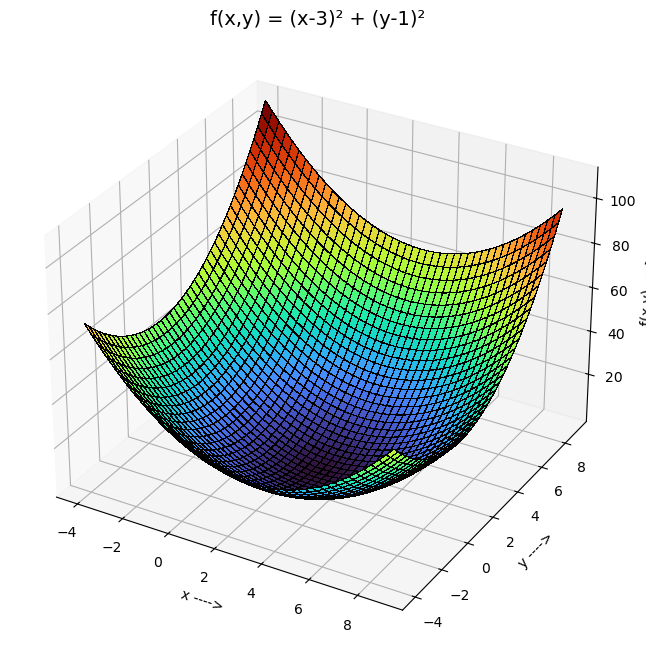

In [224]:
x=np.arange(-4,9,0.3)
y=np.arange(-4,9,0.3)
X,Y=np.meshgrid(x,y)
Z=well_conditioned(X,Y)
# Plot the surface
fig = pt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap="turbo",edgecolor='k',linewidth=0.1, antialiased=False)
ax.set_xlabel('x ---->')
ax.set_ylabel('y ---->')
ax.set_zlabel('f(x,y) ---->')
ax.set_title('f(x,y) = (x-3)² + (y-1)²',size=14)

# # Set x and y ticks
# ax.set_xticks([-6, -4, -2, 0, 2, 4, 6])
# ax.set_yticks([-6, -4, -2, 0, 2, 4, 6])

# Set grid to dotted
ax.grid(True)

pt.show()

#### Contour Plot of well conditioned Function

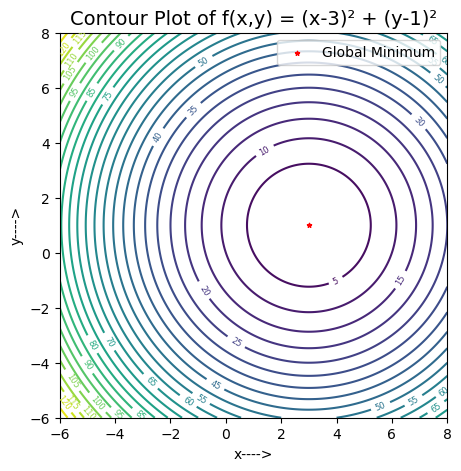

In [225]:
x = np.linspace(-6, 8, 300)
y = np.linspace(-6, 8, 300)
X, Y = np.meshgrid(x, y)
Z = well_conditioned(X, Y)

# Plot the contour plot with increased density of lines
fig=pt.figure(figsize=(5, 5))
contour = pt.contour(X, Y, Z, cmap="viridis",levels=30)  # Set the number of levels to increase density
pt.xlabel('x---->')
pt.ylabel('y---->')
pt.title('Contour Plot of f(x,y) = (x-3)² + (y-1)²',size=14)
pt.scatter(3,1,label="Global Minimum",marker='*',s=10,color="red")
pt.clabel(contour, inline=True, fontsize=6)
# Set x and y ticks
pt.xticks([-6, -4, -2, 0, 2, 4, 6,8])
pt.yticks([-6, -4, -2, 0, 2, 4, 6,8])
pt.legend()
pt.show()

#### Defining Gradient of Well Conditioned function

In [226]:
def grad_well(x,y):
    return np.array([2*(x-3),2*(y-1)])

#### Visualisation of Gradient Descent Trajectory and Contour Plot on well conditioned function

In [227]:
#for slider for c1 and ⍴ values
from ipywidgets import interactive, FloatSlider
import ipywidgets as widgets

def visualize_gradient_descent(alpha,x_start,y_start,c1=0.8,rho=0.25):
    # Create subplots
    start_point=np.array([x_start,y_start])
    fig, ax = pt.subplots(1, 3, figsize=(15, 5))
    gd_ = Gradient_Descent(well_conditioned,start_point ,grad_well, alpha, 200) 
    ax[0].scatter(gd_[:,0], gd_[:,1], color="red", s=10, marker='o')
    ax[0].plot(gd_[:, 0], gd_[:, 1], color="red", label=f"grad_descent no backtracking:{gd_[:, 0].shape[0]-1} steps")
    gd_backtrack=grad_descent_backtracking(well_conditioned,start_point,c1,rho,grad_well,200)
    ax[1].scatter(gd_backtrack[:,0], gd_backtrack[:,1], color="limegreen", s=10, marker='o')
    ax[1].plot(gd_backtrack[:, 0], gd_backtrack[:, 1], color="limegreen", label=f"grad_descent with backtracking:{gd_backtrack[:, 0].shape[0]-1} steps")
    error_=np.linalg.norm(gd_-np.array([3,1]),axis=1)
    error_backtrack=np.linalg.norm(gd_backtrack-np.array([3,1]),axis=1)
    ax[2].plot(range(gd_[:, 0].shape[0]), error_, color="blue", label="error no backtracking")
    ax[2].set_yscale('log')
    ax[2].plot(range(gd_backtrack[:, 0].shape[0]), error_backtrack, color="orange", label="error backtracking")
    # Customize the plots
    ax[0].set_xlabel('x---->')
    ax[0].set_ylabel('y---->')
    ax[0].legend(fontsize='small', loc="upper right")
    ax[0].set_title(f'Gradient Descent without Backtracking ⍺={alpha:.2f}', size=12)
    ax[1].set_xlabel('x---->')
    ax[1].set_ylabel('y---->')
    ax[1].legend(fontsize='small', loc="upper right")
    ax[1].set_title(f'Gradient Descent with Backtracking C₁={c1:.2f} ⍴={rho:.2f}', size=12)

    
    ax[2].set_xlabel('Steps---->')
    ax[2].set_ylabel('Error---->')
    ax[2].legend(fontsize='small', loc="upper right")
    ax[2].set_title('Error in 2 Norm', size=12)

    # Plot the contour plot
    x = np.linspace(-6, 12, 300)
    y = np.linspace(-6, 12, 300)
    X, Y = np.meshgrid(x, y)
    Z = well_conditioned(X, Y)
    contour = ax[0].contour(X, Y, Z, cmap="viridis",levels=30)
    ax[0].clabel(contour, inline=True, fontsize=6, fmt='%.1f', colors='black')
    contour = ax[1].contour(X, Y, Z, cmap="viridis",levels=30)
    ax[1].clabel(contour, inline=True, fontsize=6, fmt='%.1f', colors='black')
    # Show the plots
    pt.tight_layout()
    pt.show()

# Create interactive widgets for c1 and rho
alpha_slider = FloatSlider(value=0.95, min=0, max=1, step=0.01, description='⍺:')
x_start=FloatSlider(value=0, min=-6, max=8, step=0.1, description='x₀:')
y_start=FloatSlider(value=0, min=-6, max=8, step=0.1, description='y₀:')
c1_slider = FloatSlider(value=0.8, min=0, max=1, step=0.01, description='C₁:')
rho_slider = FloatSlider(value=0.25, min=0, max=1, step=0.01, description='⍴:')
# Create the interactive plot
interactive_plot = interactive(visualize_gradient_descent,alpha=alpha_slider,x_start=x_start,y_start=y_start,c1=c1_slider,rho=rho_slider)
interactive_plot


interactive(children=(FloatSlider(value=0.95, description='⍺:', max=1.0, step=0.01), FloatSlider(value=0.0, de…

#### ILL-conditioned Function

In [228]:
def ill_conditioned(x,y):
    return (10*(x-1)*(x-1) + (y-2)*(y-2))

#### Plot of ILL-conditioned Function

f(x,y) = 10(x-1)² + (y-2)²(as taken in class)

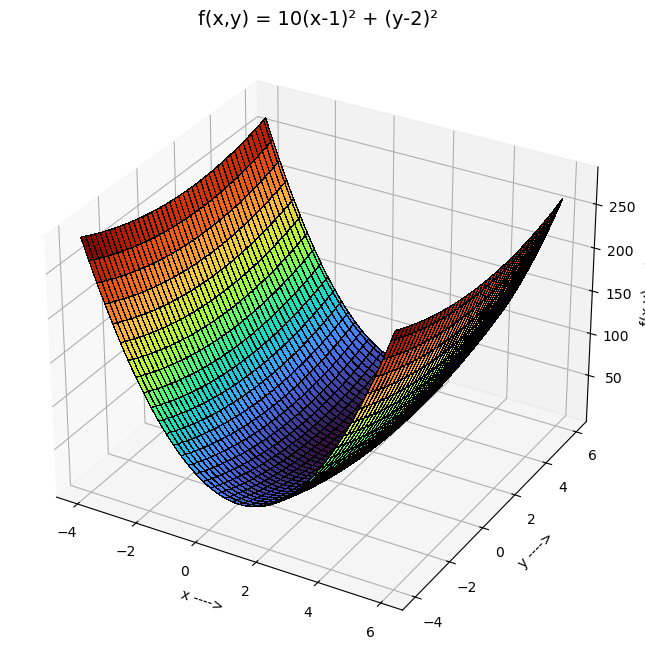

In [229]:
x=np.arange(-4,6,0.12)
y=np.arange(-4,6,0.12)
X,Y=np.meshgrid(x,y)
Z=ill_conditioned(X,Y)
# Plot the surface
fig = pt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap="turbo",edgecolor='k',linewidth=0.1, antialiased=False)
ax.set_xlabel('x ---->')
ax.set_ylabel('y ---->')
ax.set_zlabel('f(x,y) ---->')
ax.set_title('f(x,y) = 10(x-1)² + (y-2)²',size=14)

# # Set x and y ticks
# ax.set_xticks([-6, -4, -2, 0, 2, 4, 6])
# ax.set_yticks([-6, -4, -2, 0, 2, 4, 6])

# Set grid to dotted
ax.grid(True)

pt.show()

#### Contour Plot of ILL-conditioned Function

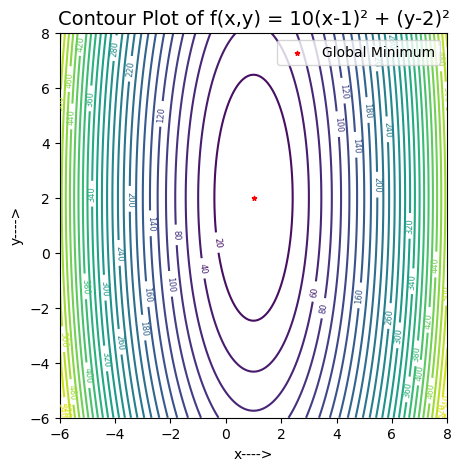

In [230]:
x = np.linspace(-6, 8, 300)
y = np.linspace(-6, 8, 300)
X, Y = np.meshgrid(x, y)
Z = ill_conditioned(X, Y)

# Plot the contour plot with increased density of lines
fig=pt.figure(figsize=(5, 5))
contour = pt.contour(X, Y, Z, cmap="viridis",levels=30)  # Set the number of levels to increase density
pt.xlabel('x---->')
pt.ylabel('y---->')
pt.title('Contour Plot of f(x,y) = 10(x-1)² + (y-2)²',size=14)
pt.scatter(1,2,label="Global Minimum",marker='*',s=10,color="red")
pt.clabel(contour, inline=True, fontsize=6)
# Set x and y ticks
pt.xticks([-6, -4, -2, 0, 2, 4, 6,8])
pt.yticks([-6, -4, -2, 0, 2, 4, 6,8])
pt.legend()
pt.show()

#### Defining Gradient of ILL Conditioned function

In [231]:
def grad_ill(x,y):
    return np.array([20*(x-1),2*(y-2)])

#### Visualisation of Gradient Descent Trajectory and Contour Plot on ILL conditioned function

In [232]:
def visualize_gradient_descent(alpha,x_start,y_start,c1=0.8,rho=0.25):
    # Create subplots
    start_point=np.array([x_start,y_start])
    fig, ax = pt.subplots(1, 3, figsize=(15, 5))
    gd_ = Gradient_Descent(ill_conditioned,start_point,grad_ill , alpha, 1000) 
    ax[0].scatter(gd_[:,0], gd_[:,1], color="red", s=10, marker='o')
    ax[0].plot(gd_[:, 0], gd_[:, 1], color="red", label=f"grad_descent no backtracking:{gd_[:, 0].shape[0]-1} steps")
    gd_backtrack=grad_descent_backtracking(ill_conditioned,start_point,c1,rho,grad_ill,1000)
    ax[1].scatter(gd_backtrack[:,0], gd_backtrack[:,1], color="limegreen", s=10, marker='o')
    ax[1].plot(gd_backtrack[:, 0], gd_backtrack[:, 1], color="limegreen", label=f"grad_descent with backtracking:{gd_backtrack[:, 0].shape[0]-1} steps")
    error_=np.linalg.norm(gd_-np.array([1,2]),axis=1)
    error_backtrack=np.linalg.norm(gd_backtrack-np.array([1,2]),axis=1)
    ax[2].plot(range(gd_[:, 0].shape[0]), error_, color="blue", label="error no backtracking")
    ax[2].set_yscale('log')
    ax[2].plot(range(gd_backtrack[:, 0].shape[0]), error_backtrack, color="orange", label="error backtracking")
    # Customize the plots
    ax[0].set_xlabel('x---->')
    ax[0].set_ylabel('y---->')
    ax[0].legend(fontsize='small', loc="upper right")
    ax[0].set_title(f'Gradient Descent without Backtracking ⍺={alpha:.2f}', size=12)
    ax[1].set_xlabel('x---->')
    ax[1].set_ylabel('y---->')
    ax[1].legend(fontsize='small', loc="upper right")
    ax[1].set_title(f'Gradient Descent with Backtracking C₁={c1:.2f} ⍴={rho:.2f}', size=12)

    
    ax[2].set_xlabel('Steps---->')
    ax[2].set_ylabel('Error---->')
    ax[2].legend(fontsize='small', loc="upper right")
    ax[2].set_title('Error in 2 Norm', size=12)

    # Plot the contour plot
    x = np.linspace(-6, 10, 300)
    y = np.linspace(-6, 10, 300)
    X, Y = np.meshgrid(x, y)
    Z = ill_conditioned(X, Y)
    contour = ax[0].contour(X, Y, Z, cmap="viridis",levels=25)
    ax[0].clabel(contour, inline=True, fontsize=6, fmt='%.1f', colors='black')
    contour = ax[1].contour(X, Y, Z, cmap="viridis",levels=25)
    ax[1].clabel(contour, inline=True, fontsize=6, fmt='%.1f', colors='black')
    # Show the plots
    pt.tight_layout()
    pt.show()

# Create interactive widgets for c1 and rho
alpha_slider = FloatSlider(value=0.1, min=0.01, max=0.1, step=0.01, description='⍺:')
x_start=FloatSlider(value=0, min=-6, max=8, step=0.1, description='x₀:')
y_start=FloatSlider(value=0, min=-6, max=8, step=0.1, description='y₀:')
c1_slider = FloatSlider(value=0.8, min=0, max=1, step=0.01, description='C₁:')
rho_slider = FloatSlider(value=0.25, min=0, max=1, step=0.01, description='⍴:')
# Create the interactive plot
interactive_plot = interactive(visualize_gradient_descent,alpha=alpha_slider,x_start=x_start,y_start=y_start,c1=c1_slider,rho=rho_slider)
interactive_plot


interactive(children=(FloatSlider(value=0.1, description='⍺:', max=0.1, min=0.01, step=0.01), FloatSlider(valu…

#### Try to initialize x₀ so that gradient at x₀ align along vmax and vmin and check the convergence with different alpha values.

#### Case 1: ILL conditioned Function
On calculating eigen values and eigen vectors of Hessian Matrix of the given function we found 
- λmax = 20 and λmin = 2
- vmax = [1,0] (x-axis) and vmin = [0,1] (y-axis)

- If I want g to align with vmin:
    then 20(x-1)=0 means x = 1 and y can be anything
- If I want to g to align with vmax:
    then 2(y-2) = 0 means y = 2 and x can be anything

### Align along Vmax

In [233]:
start_point=np.array([np.random.uniform(-4,4),2]) # Align along Vmax
def visualize_gradient_descent(alpha,c1=0.8,rho=0.25):
    # Create subplots
    fig, ax = pt.subplots(1, 3, figsize=(15, 5))
    gd_ = Gradient_Descent(ill_conditioned,start_point,grad_ill , alpha, 1000) #claculate path for gradient descent with backtracking
    ax[0].scatter(gd_[:,0], gd_[:,1], color="red", s=10, marker='o')
    ax[0].plot(gd_[:, 0], gd_[:, 1], color="red", label=f"grad_descent no backtracking:{gd_[:, 0].shape[0]-1} steps with start point:({start_point[0]:.2f},{start_point[1]:.2f})")
    gd_backtrack=grad_descent_backtracking(ill_conditioned,start_point,c1,rho,grad_ill,1000)
    ax[1].scatter(gd_backtrack[:,0], gd_backtrack[:,1], color="limegreen", s=10, marker='o')
    ax[1].plot(gd_backtrack[:, 0], gd_backtrack[:, 1], color="limegreen", label=f"grad_descent with backtracking:{gd_backtrack[:, 0].shape[0]-1} steps with start point:({start_point[0]:.2f},{start_point[1]:.2f})")
    error_=np.linalg.norm(gd_-np.array([1,2]),axis=1)
    error_backtrack=np.linalg.norm(gd_backtrack-np.array([1,2]),axis=1)
    ax[2].plot(range(gd_[:, 0].shape[0]), error_, color="blue", label="error no backtracking")
    ax[2].set_yscale('log')
    ax[2].plot(range(gd_backtrack[:, 0].shape[0]), error_backtrack, color="orange", label="error backtracking")
    # Customize the plots
    ax[0].set_xlabel('x---->')
    ax[0].set_ylabel('y---->')
    ax[0].legend(fontsize='x-small', loc="upper right")
    ax[0].set_title(f'Gradient Descent without Backtracking ⍺={alpha:.2f}', size=12)
    ax[1].set_xlabel('x---->')
    ax[1].set_ylabel('y---->')
    ax[1].legend(fontsize='x-small', loc="upper right")
    ax[1].set_title(f'Gradient Descent with Backtracking C₁={c1:.2f} ⍴={rho:.2f}', size=12)

    
    ax[2].set_xlabel('Steps---->')
    ax[2].set_ylabel('Error---->')
    ax[2].legend(fontsize='small', loc="upper right")
    ax[2].set_title('Error in 2 Norm', size=12)

    # Plot the contour plot
    x = np.linspace(-6, 10, 300)
    y = np.linspace(-6, 10, 300)
    X, Y = np.meshgrid(x, y)
    Z = ill_conditioned(X, Y)
    contour = ax[0].contour(X, Y, Z, cmap="viridis",levels=25)
    ax[0].clabel(contour, inline=True, fontsize=6, fmt='%.1f', colors='black')
    contour = ax[1].contour(X, Y, Z, cmap="viridis",levels=25)
    ax[1].clabel(contour, inline=True, fontsize=6, fmt='%.1f', colors='black')
    # Show the plots
    pt.tight_layout()
    pt.show()

# Create interactive widgets for c1 and rho
alpha_slider = FloatSlider(value=0.05, min=0, max=0.1, step=0.01, description='⍺:')
c1_slider = FloatSlider(value=0.8, min=0, max=1, step=0.01, description='C₁:')
rho_slider = FloatSlider(value=0.25, min=0, max=1, step=0.01, description='⍴:')
# Create the interactive plot
interactive_plot = interactive(visualize_gradient_descent,alpha=alpha_slider,c1=c1_slider,rho=rho_slider)
interactive_plot


interactive(children=(FloatSlider(value=0.05, description='⍺:', max=0.1, step=0.01), FloatSlider(value=0.8, de…

As discussed in class if our gradient aligns with v_max then we need to take lower step sizes
#### as ⍺⋆ = 1/λmax when gradient aligns with vmax
that's why when my alpha optimal close to 1/20 i.e 0.05 or in its nearby range my gradient descent with fixed ⍺ gives much better results compare to gradient descent with backtracking

### Align Along Vmin

In [234]:
start_point=np.array([1,np.random.uniform(-4,4)]) # Align along Vmin
def visualize_gradient_descent(alpha,c1=0.80,rho=0.25):
    # Create subplots
    fig, ax = pt.subplots(1, 3, figsize=(15, 5))
    gd_ = Gradient_Descent(ill_conditioned,start_point,grad_ill , alpha, 1000) 
    ax[0].scatter(gd_[:,0], gd_[:,1], color="red", s=10, marker='o')
    ax[0].plot(gd_[:, 0], gd_[:, 1], color="red", label=f"grad_descent no backtracking:{gd_[:, 0].shape[0]-1} steps with start point:({start_point[0]:.2f},{start_point[1]:.2f})")
    gd_backtrack=grad_descent_backtracking(ill_conditioned,start_point,c1,rho,grad_ill,1000)
    ax[1].scatter(gd_backtrack[:,0], gd_backtrack[:,1], color="limegreen", s=10, marker='o')
    ax[1].plot(gd_backtrack[:, 0], gd_backtrack[:, 1], color="limegreen", label=f"grad_descent with backtracking:{gd_backtrack[:, 0].shape[0]-1} steps with start point:({start_point[0]:.2f},{start_point[1]:.2f})")
    error_=np.linalg.norm(gd_-np.array([1,2]),axis=1)
    error_backtrack=np.linalg.norm(gd_backtrack-np.array([1,2]),axis=1)
    ax[2].plot(range(gd_[:, 0].shape[0]), error_, color="blue", label="error no backtracking")
    ax[2].set_yscale('log')
    ax[2].plot(range(gd_backtrack[:, 0].shape[0]), error_backtrack, color="orange", label="error backtracking")
    # Customize the plots
    ax[0].set_xlabel('x---->')
    ax[0].set_ylabel('y---->')
    ax[0].legend(fontsize='x-small', loc="upper right")
    ax[0].set_title(f'Gradient Descent without Backtracking ⍺={alpha:.2f}', size=12)
    ax[1].set_xlabel('x---->')
    ax[1].set_ylabel('y---->')
    ax[1].legend(fontsize='x-small', loc="upper right")
    ax[1].set_title(f'Gradient Descent with Backtracking C₁={c1:.2f} ⍴={rho:.2f}', size=12)

    
    ax[2].set_xlabel('Steps---->')
    ax[2].set_ylabel('Error---->')
    ax[2].legend(fontsize='small', loc="upper right")
    ax[2].set_title('Error in 2 Norm', size=12)

    # Plot the contour plot
    x = np.linspace(-6, 10, 300)
    y = np.linspace(-6, 10, 300)
    X, Y = np.meshgrid(x, y)
    Z = ill_conditioned(X, Y)
    contour = ax[0].contour(X, Y, Z, cmap="viridis",levels=25)
    ax[0].clabel(contour, inline=True, fontsize=6, fmt='%.1f', colors='black')
    contour = ax[1].contour(X, Y, Z, cmap="viridis",levels=25)
    ax[1].clabel(contour, inline=True, fontsize=6, fmt='%.1f', colors='black')
    # Show the plots
    pt.tight_layout()
    pt.show()

# Create interactive widgets for c1 and rho
alpha_slider_1 = FloatSlider(value=0.5, min=0, max=1, step=0.01, description='⍺:')
c1_slider = FloatSlider(value=0.8, min=0, max=1, step=0.01, description='C₁:')
rho_slider = FloatSlider(value=0.25, min=0, max=1, step=0.01, description='⍴:')
# Create the interactive plot
interactive_plot = interactive(visualize_gradient_descent,alpha=alpha_slider_1,c1=c1_slider,rho=rho_slider)
interactive_plot


interactive(children=(FloatSlider(value=0.5, description='⍺:', max=1.0, step=0.01), FloatSlider(value=0.8, des…

As discussed in class if our gradient aligns with v_min then we need to take larger step sizes
#### as ⍺⋆ = 1/λmin when gradient aligns with vmin
that's why when my alpha optimal close to 1/2 i.e 0.5 or in its nearby range my gradient descent with fixed ⍺ gives much better results compare to gradient descent with backtracking

### Case-2 Well conditioned Function

- for the given function λmax = λmin = 2 and Hessian Matrix is [[2,0],[0,2]]
- So for the given function any initial point x₀ align with vmax or vmin
- Also in this case ⍺⋆=1/λmax or 1/λmin will be 1/2 = 0.5

that's why any Initial point we take Gradient Descent with fixed ⍺ will give much better result compared to gradient descent with back tracking in case of ⍺ = 0.5 or any value in nearby range like ⍺=0.4 


## Questions from Backtracking Notes

### For Well Conditioned Function
### for ⍺=0.4 backtracking become suboptimal why?

#### 1: Is it because of shape of particular objective function?
In some sense yes because this is happening because alpha is close to ⍺⋆ value which depend on gradient and Hessian Matrix (2nd order curvature) so it will depend on shape of objective function
#### 2: Is it because of hyper parameters c1 and ⍴?
Yes as for ⍺=0.4 and initial point (0,0) it took 13 steps in gradient descent with fixed ⍺, on the other hand if c1=0.8 and ⍴=0.25 it tooks 130 steps but if c1=0.28 and ⍴=0.50 it just take us 2 iterations to converge from (0,0)
#### 3: Is there is relation b/w λmax (or) λmin to (⍺=0.4) chosen?
yes, In this case λmax (or) λmin = 2 so for any initial point gradient is align to vmax or vmin so ⍺*=1/λmax or 1/λmin so ⍺⋆ = 0.5 and chosen ⍺ is close to it that's why gradient descent with fixed ⍺ is converging faster
#### 4: Is there is bug in code? 
No, I don't feel there is any bug in code

### For ILL Conditioned Function
### for ⍺=0.07 backtracking become suboptimal why?

#### 1: Is it because of shape of particular objective function?
In some sense yes because this is happening because alpha is close to ⍺⋆ value which depend on gradient and Hessian Matrix (2nd order curvature) so it will depend on shape of objective function
#### 2: Is it because of hyper parameters c1 and ⍴?
Yes as for ⍺=0.07 and initial point (0,0) it took 113 steps in gradient descent with fixed ⍺, on the other hand if c1=0.8 and ⍴=0.25 it tooks 132 steps but if c1=0.28 and ⍴=0.20 it just take us 61 iterations to converge from (0,0)
#### 3: Is there is relation b/w λmax (or) λmin to (⍺=0.07) chosen?
yes, In this case λmax = 20 and λmin = 2 so for initial point for which gradient is align to vmax or vmin so ⍺*=1/λmax or 1/λmin respectively so ⍺⋆ = 0.05 (for g align to vmax) or ⍺⋆ = 0.5 (for g align to vmin) 
for given x₀=(0,0) gradient is [-20,-4] so angle between gradient and [1,0] (vmax) is 45.6 and angle between gradient and [0,1] (vmin) is 82 so more close to vmax that's why chosen ⍺(0.07) is close to 0.05 that's why gradient descent with fixed ⍺ is converging faster in this case but not that fast because not completely align to vmax or vmin.
#### 4: Is there is bug in code? 
No, I don't feel there is any bug in code